## Récupération des statistiques par pays 
- via l'API https://api.covid19api.com/summary

In [200]:
import requests
import json

# Récupération des stats par pays
def stat_country(country):
    url = 'https://api.covid19api.com/summary'
    response = requests.get(url)
    data = response.json()
    for c in data['Countries']:
         if c['Country']== country:
            print("#### ", country, " ####")
            print("Nouveaux cas confirmés en 24h : ", c['NewConfirmed'] )
            print("Total nombre de cas: ", c['TotalConfirmed'])
            print("Nombre de nouveau décès en 24h: ", c['NewDeaths'])
            print("Nombre de total de décès: ", c['TotalDeaths'])
            print("\n")

## Exemple de résultats sur les pays : France, Italie, Espagne

In [406]:
stat_country('France')
stat_country('Italy')
stat_country('Spain')

####  France  ####
Nouveaux cas confirmés en 24h :  3851
Total nombre de cas:  33402
Nombre de nouveau décès en 24h:  299
Nombre de total de décès:  1997


####  Italy  ####
Nouveaux cas confirmés en 24h :  5909
Total nombre de cas:  86498
Nombre de nouveau décès en 24h:  919
Nombre de total de décès:  9134


####  Spain  ####
Nouveaux cas confirmés en 24h :  7933
Total nombre de cas:  65719
Nombre de nouveau décès en 24h:  773
Nombre de total de décès:  5138




## Récupération des données de cas confirmés par pays
- via l'api https://api.covid19api.com/total/country/spain/confirmed

In [149]:
def total_case_confirmed_by_country(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/confirmed"
    response = requests.get(url)
    data = response.json()
    confirmed = []
    for d in data:
        last = d['Cases']
        confirmed.append(last)
    return confirmed

## Exemple d'utilisation graphique
- sans décalage pour la France

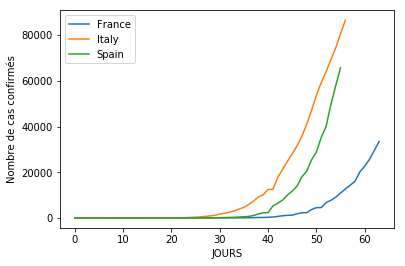

In [407]:
plt.plot(total_case_confirmed_by_country("France"), label='France')
plt.plot(total_case_confirmed_by_country("Italy"), label='Italy')
plt.plot(total_case_confirmed_by_country("Spain"), label='Spain')
#plt.plot(total_case_confirmed_by_country("US"), label='US')
#plt.plot(total_case_confirmed_by_country("China"), label='China')
plt.ylabel('Nombre de cas confirmés')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des données de nouveaux cas confirmés par pays
- via l'api https://api.covid19api.com/total/country/spain/confirmed

In [158]:
def new_case_confirmed_by_country_per_day(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/confirmed"
    response = requests.get(url)
    data = response.json()
    nb_case = 0
    cpt = 0
    confirmed = []
    for d in data:
        cpt = cpt+1
        last = d['Cases']
        new = last - nb_case
        nb_case = last
    
        confirmed.append(new)
    return confirmed

## Exemple d'utilisation graphique
- sans décalage de données pour la France

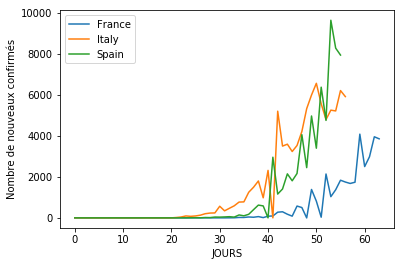

In [408]:
plt.plot(new_case_confirmed_by_country_per_day("France"), label='France')
plt.plot(new_case_confirmed_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_confirmed_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux confirmés')
plt.xlabel('JOURS')
plt.legend()
plt.show()

- Avec 11 jours de décalage pour la France pour affiner la tendance avec les deux autres pays

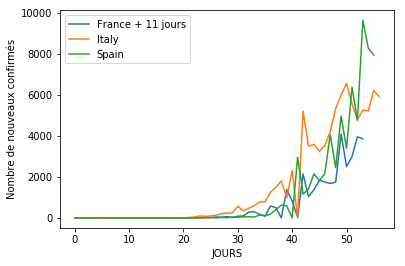

In [409]:
plt.plot(new_case_confirmed_by_country_per_day("France")[10:], label='France + 11 jours')
plt.plot(new_case_confirmed_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_confirmed_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux confirmés')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des décès totaux par pays

In [153]:
def total_case_death_by_country(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/deaths"
    response = requests.get(url)
    data = response.json()
    deaths = []
    for d in data:
        last = d['Cases']
        deaths.append(last)
    return deaths

## Exemple d'utilisation graphique
- sans décalage pour la france

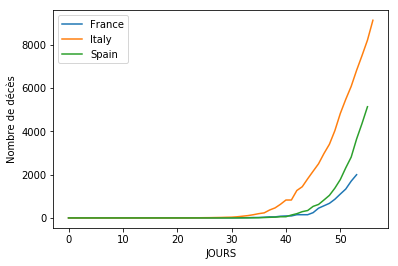

In [410]:
plt.plot(total_case_death_by_country("France")[10:], label='France')
plt.plot(total_case_death_by_country("Italy"), label='Italy')
plt.plot(total_case_death_by_country("Spain"), label='Spain')
#plt.plot(total_case_death_by_country("US"), label='US')
plt.ylabel('Nombre de décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Récupération des données de nouveaux décès par pays
- via l'API https://api.covid19api.com/total/country/spain/status/deaths

In [134]:
def new_case_death_by_country_per_day(country):
    url = "https://api.covid19api.com/total/country/"+ country + "/status/deaths"
    response = requests.get(url)
    data = response.json()
    nb_case = 0
    cpt = 0
    deaths=[]
    for d in data:
        cpt = cpt
        last = d['Cases']
        new = last - nb_case
        nb_case = last
        deaths.append(new)
    return deaths

## Exemple d'utilisation graphique
- avec décalage de 11 jours pour la France

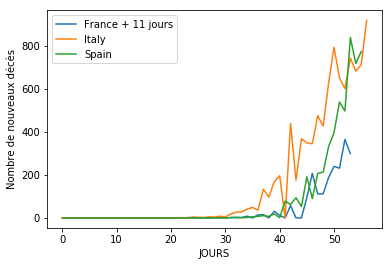

In [411]:
# affichage des 3 courbes décés : France, Italie, Espagne
plt.plot(new_case_death_by_country_per_day("France")[10:], label='France + 11 jours')
plt.plot(new_case_death_by_country_per_day("Italy"), label='Italy')
plt.plot(new_case_death_by_country_per_day("Spain"), label='Spain')
plt.ylabel('Nombre de nouveaux décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

## Comparaison avec la Chine

In [184]:
stat_country('China')

####  China  ####
Nouveaux cas confirmés en 24h :  121
Total nombre de cas:  81782
Nombre de nouveau décès en 24h:  6
Nombre de total de décès:  3291




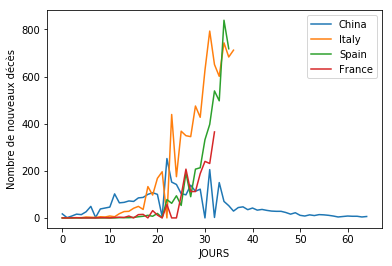

In [195]:
plt.plot(new_case_death_by_country_per_day("China"), label='China')
plt.plot(new_case_death_by_country_per_day("Italy")[19:], label='Italy')
plt.plot(new_case_death_by_country_per_day("Spain")[19:], label='Spain')
plt.plot(new_case_death_by_country_per_day("France")[30:], label='France')
#plt.plot(new_case_death_by_country_per_day("US")[30:], label='US')
plt.ylabel('Nombre de nouveaux décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

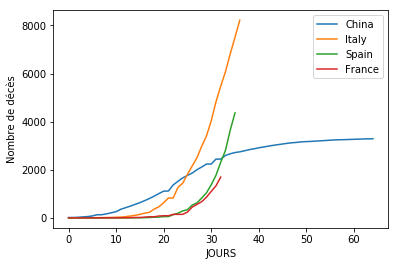

In [196]:
plt.plot(total_case_death_by_country("China"), label='China')
#plt.plot(total_case_death_by_country("US")[40:], label='US')
plt.plot(total_case_death_by_country("Italy")[19:], label='Italy')
plt.plot(total_case_death_by_country("Spain")[19:], label='Spain')
plt.plot(total_case_death_by_country("France")[30:], label='France')
plt.ylabel('Nombre de décès')
plt.xlabel('JOURS')
plt.legend()
plt.show()

Sur ce dernier graphique, on se rend bien compte que les courbes de l'Italie, l'Espagne et la France ont exactement les mêmes tendances. La courbe de la Chine a atteint une phase de stabilisation, même si l'on n'a quelques nouveaux cas encore.

## Récupération data France 
- via api : https://api.covid19api.com/all

In [404]:
import pandas as pd
import numpy as np

def data_country(country):
    url = 'https://api.covid19api.com/all'
    response = requests.get(url)
    data = response.json()
    confirm =[]
    deaths = []
    recover= []
    index =[]
    cpt=0
    country_df = pd.DataFrame(columns=['Country', 'Province', 'Lat', 'Lon', 'Date', 'Cases', 'Status'])
    for c in data:
        if c['Country']== country:
            cpt+=1
            index.append(cpt)
            dfc = pd.DataFrame(c, index=[cpt], columns=['Country', 'Province', 'Lat', 'Lon', 'Date', 'Cases', 'Status'])
            country_df =  pd.concat([country_df, dfc])
            if c['Status']=="confirmed":
                confirm.append(c['Cases'])
            if c['Status']=="deaths":
                deaths.append(c['Cases'])
            if c['Status']=="recovered":
                recover.append(c['Cases'])
    return country_df

In [405]:
data_country("France")

,Country,Province,Lat,Lon,Date,Cases,Status
1,France,,0,0,2020-01-24T00:00:00Z,2,confirmed
2,France,,0,0,2020-01-24T00:00:00Z,0,recovered
3,France,,0,0,2020-01-24T00:00:00Z,0,deaths
4,France,,0,0,2020-01-25T00:00:00Z,3,confirmed
5,France,,0,0,2020-01-25T00:00:00Z,0,recovered
6,France,,0,0,2020-01-25T00:00:00Z,0,deaths
7,France,,0,0,2020-01-26T00:00:00Z,3,confirmed
8,France,,0,0,2020-01-26T00:00:00Z,0,recovered
9,France,,0,0,2020-01-26T00:00:00Z,0,deaths
10,France,,0,0,2020-01-27T00:00:00Z,3,confirmed
